In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os


In [2]:
#titles dataset from https://www.kaggle.com/datasets/victorsoeiro/rakuten-tv-dramas-and-movies/code?select=credits.csv
titles=pd.read_csv('/Users/YumaryVasquez/Desktop/data_science.nosync/viki/titles.csv')
titles.shape

(1904, 15)

In [3]:
titles.isnull().sum().sort_values(ascending=False)

age_certification       1631
imdb_score               534
imdb_votes               534
imdb_id                  448
seasons                  434
tmdb_score               399
description               80
tmdb_popularity           62
id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

In [4]:
#filling up nulls with median of datasets
median_imdb_votes=titles['imdb_votes'].median()
titles['imdb_votes']=titles['imdb_votes'].fillna(median_imdb_votes)

median_imdb_score=titles['imdb_score'].median()
titles['imdb_score']=titles['imdb_score'].fillna(median_imdb_score)

median_seasons=titles['seasons'].median()
titles['seasons']=titles['seasons'].fillna(median_seasons)

median_tmdb_score=titles['tmdb_score'].median()
titles['tmdb_score']=titles['tmdb_score'].fillna(median_tmdb_score)

median_tmdb_popularity=titles['tmdb_popularity'].median()
titles['tmdb_popularity']=titles['tmdb_popularity'].fillna(median_tmdb_popularity)

In [5]:
titles = titles.drop(columns=['age_certification', 'imdb_id'])
titles.isnull().sum().sort_values(ascending=False)

description             80
id                       0
title                    0
type                     0
release_year             0
runtime                  0
genres                   0
production_countries     0
seasons                  0
imdb_score               0
imdb_votes               0
tmdb_popularity          0
tmdb_score               0
dtype: int64

In [6]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,2016.794118,63.112920,1.184874,7.146061,985.593487,8.584648,7.366229
std,4.442148,30.537682,1.659528,0.863303,6138.115613,15.002098,1.267393
min,1973.000000,0.000000,1.000000,1.400000,5.000000,0.069592,1.000000
25%,2015.000000,44.000000,1.000000,6.800000,83.000000,2.186250,6.900000
50%,2018.000000,60.000000,1.000000,7.300000,188.500000,4.616500,7.500000
75%,2020.000000,80.000000,1.000000,7.600000,417.500000,9.482500,8.000000
max,2022.000000,160.000000,57.000000,9.600000,208644.000000,381.236000,10.000000


In [7]:
titles.groupby('type').size()

type
MOVIE     434
SHOW     1470
dtype: int64

In [8]:
movies_release = titles[(titles['type'] == 'MOVIE') & (titles['release_year'] < 2022)]

In [9]:
show_release = titles[(titles['type'] == 'SHOW') & (titles['release_year'] < 2022)]

In [10]:
mov_trend = movies_release.groupby(['release_year']).size().to_frame('total')

In [11]:
show_trend = show_release.groupby(['release_year']).size().to_frame('total')

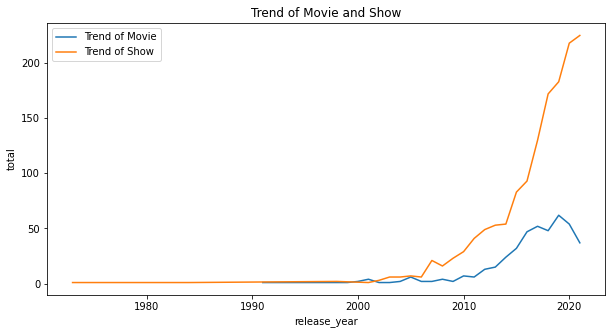

In [12]:
plt.figure(figsize=(10,5))
plt.title("Trend of Movie and Show")
sns.lineplot(data=mov_trend,x='release_year',y='total')
sns.lineplot(data=show_trend,x='release_year',y='total')
plt.legend(labels=["Trend of Movie","Trend of Show"])

In [13]:
avgrt = titles.groupby('release_year')['runtime'].agg(['mean'])

<AxesSubplot:xlabel='release_year', ylabel='mean'>

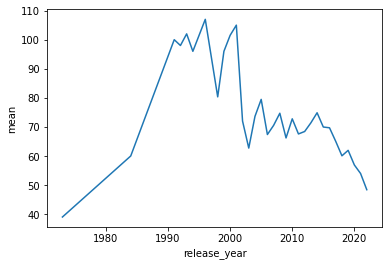

In [14]:
sns.lineplot(data=avgrt,x='release_year',y='mean')

<AxesSubplot:>

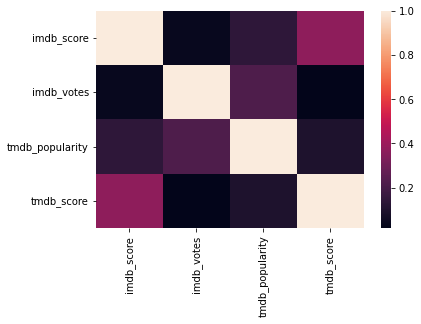

In [15]:
dfcor = titles[['imdb_score','imdb_votes','tmdb_popularity','tmdb_score']].corr()
sns.heatmap(dfcor)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from scipy import sparse
from sklearn.metrics.pairwise import linear_kernel

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
titles['genres'] = titles['genres'].fillna('')
titles['description'] = titles['description'].fillna('')

In [18]:
tfidf_matrix = tfidf.fit_transform(titles['genres'])
tfidf_matrix2 = tfidf.fit_transform(titles['description'])
combined_matrix = sparse.hstack((tfidf_matrix, tfidf_matrix2))

In [19]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
indices = pd.Series(titles.index, index=titles['title']).drop_duplicates()

In [21]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles['title'].iloc[movie_indices]

In [33]:
get_recommendations('Falling Into Your Smile')

334                         Bel Ami
136           Heading to the Ground
1771              ONLY JUST MARRIED
312                      Reply 1994
744         My ID is Gangnam Beauty
1666         Assistant of Superstar
437                     Oh My Venus
778     Master Devil Do Not Kiss Me
1833                    Be Together
153           Get Karl! Oh Soo Jung
Name: title, dtype: object

In [23]:
#combined description and genre 
cosine_sim = linear_kernel(combined_matrix, combined_matrix)
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles['title'].iloc[movie_indices]


In [24]:
get_recommendations('Strong Woman Do Bong Soon')

1106        The Golden Eyes
1171                   Item
300          Gu Family Book
346      The Night Watchman
1167            Joy of Life
1089      Extraordinary You
1263    Love and Redemption
920      Lost Love in Times
829         Legend of Fuyao
463                  Kairos
Name: title, dtype: object

In [ ]:
#credits dataset from https://www.kaggle.com/datasets/victorsoeiro/rakuten-tv-dramas-and-movies/code?select=credits.csv
credits=pd.read_csv('/Users/YumaryVasquez/Desktop/data_science.nosync/viki/credits.csv')
credits.shape

credits.isnull().sum().sort_values(ascending=False)

tfidf = TfidfVectorizer(stop_words='english')


In [ ]:
# below is code to recommend shows based on actors

In [98]:
new_df = pd.merge(titles[['id','title','genres']],credits[['id','name']],on='id', how='left')

In [99]:
new_df

,id,title,genres,name
0,ts299859,Serendipity,[],NaN
1,ts43055,Entertainment Weekly,['reality'],NaN
2,tm21196,Il Mare,"['fantasy', 'scifi', 'romance', 'drama', 'docu...",Jun Ji-hyun
3,tm21196,Il Mare,"['fantasy', 'scifi', 'romance', 'drama', 'docu...",Lee Jung-jae
4,tm21196,Il Mare,"['fantasy', 'scifi', 'romance', 'drama', 'docu...",Kim Mu-saeng
...,...,...,...,...
19597,ts300333,One Hour Left Until the First Affair,"['drama', 'romance']",Asami Usuda
19598,ts300333,One Hour Left Until the First Affair,"['drama', 'romance']",Riku Hagiwara
19599,ts300333,One Hour Left Until the First Affair,"['drama', 'romance']",Mai Kiryu
19600,ts300333,One Hour Left Until the First Affair,"['drama', 'romance']",Akiko Ohku


In [101]:
new_df['name'] = new_df['name'].fillna('')
new_df['title'] = new_df['title'].fillna('')

In [102]:
#tfidf_matrix = tfidf.fit_transform(new_df['name'])
tfidf_matrix2 = tfidf.fit_transform(new_df['title'])
#combined_matrix = sparse.hstack((tfidf_matrix, tfidf_matrix2))

In [103]:
indices = pd.Series(new_df.index, index=new_df['name']).drop_duplicates()

In [104]:
cosine_sim = linear_kernel(combined_matrix, combined_matrix)

In [105]:

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return new_df['name'].iloc[movie_indices]



In [106]:
get_recommendations('Yang Yang')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()